# classical TPA: direct force

In this example a numerical example is used to demonstrate a direct force TPA example with a virtual point transformation at the interface.

In [2]:
import pyFBS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from matplotlib.colors import LogNorm
%matplotlib inline

## Example datasets

Load the required predefined datasets:

In [3]:
pyFBS.download_lab_testbench()

100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 4652.95it/s]

In [4]:
xlsx_pos = r"./lab_testbench/Measurements/TPA_synt.xlsx"

stl_A = r"./lab_testbench/STL/A.stl"
stl_B = r"./lab_testbench/STL/B.stl"
stl_AB = r"./lab_testbench/STL/AB.stl"

df_acc_AB = pd.read_excel(xlsx_pos, sheet_name='Sensors_AB')
df_chn_AB = pd.read_excel(xlsx_pos, sheet_name='Channels_AB')
df_imp_AB = pd.read_excel(xlsx_pos, sheet_name='Impacts_AB')

df_acc_A = pd.read_excel(xlsx_pos, sheet_name='Sensors_A')
df_chn_A = pd.read_excel(xlsx_pos, sheet_name='Channels_A')
df_imp_A = pd.read_excel(xlsx_pos, sheet_name='Impacts_A')

df_acc_B = pd.read_excel(xlsx_pos, sheet_name='Sensors_B')
df_imp_B = pd.read_excel(xlsx_pos, sheet_name='Impacts_B')
df_chn_B = pd.read_excel(xlsx_pos, sheet_name='Channels_B')

df_vp = pd.read_excel(xlsx_pos, sheet_name='VP_Channels')
df_vpref = pd.read_excel(xlsx_pos, sheet_name='VP_RefChannels')

## Numerical model

Load the corresponding .full and .ress file from the example datasets:

In [5]:
full_file_AB = r"./lab_testbench/FEM/AB.full"
ress_file_AB = r"./lab_testbench/FEM/AB.rst"

full_file_B = r"./lab_testbench/FEM/B.full"
ress_file_B = r"./lab_testbench/FEM/B.rst"

full_file_A = r"./lab_testbench/FEM/A.full"
ress_file_A = r"./lab_testbench/FEM/A.rst"

 Create an MK model for each component:

In [6]:
MK_AB = pyFBS.MK_model(ress_file_AB, full_file_AB, no_modes=100, recalculate=False)
MK_A = pyFBS.MK_model(ress_file_A, full_file_A, no_modes=100, recalculate=False)
MK_B = pyFBS.MK_model(ress_file_B ,full_file_B, no_modes=100, recalculate=False)

C:\Users\tomaz.bregar\Anaconda3\lib\site-packages\pyvista\core\pointset.py:610: UserWarning: VTK 9 no longer accepts an offset array
  warnings.warn('VTK 9 no longer accepts an offset array')


 Update locations of channels and impacts to snap to the nearest FE node:

In [7]:
df_chn_AB_up = MK_AB.update_locations_df(df_chn_AB)
df_imp_AB_up = MK_AB.update_locations_df(df_imp_AB)

df_chn_A_up = MK_A.update_locations_df(df_chn_A)
df_imp_A_up = MK_A.update_locations_df(df_imp_A)

df_chn_B_up = MK_B.update_locations_df(df_chn_B)
df_imp_B_up = MK_B.update_locations_df(df_imp_B)

## 3D view

Open 3D viewer in the background. With the 3D viewer the subplot capabilities of PyVista can be used.

In [8]:
view3D = pyFBS.view3D(show_origin=False, show_axes=False, shape=(2,2), title="TPA")

Add the STL file of structure AB to the 1-1 subplot and show the corresponding accelerometer, channels and impacts.

In [9]:
view3D.plot.subplot(0,0)
view3D.plot.add_text("AB", position='upper_left', font_size=10, color="k", font="times", name="AB_structure")

view3D.add_stl(stl_AB, name="AB_structure", color="#8FB1CC", opacity=.1)
view3D.plot.add_mesh(MK_AB.mesh, scalars=np.zeros(MK_AB.mesh.points.shape[0]), show_scalar_bar=False, name="mesh_AB", cmap="coolwarm", show_edges=True)
view3D.show_chn(df_chn_AB_up, color="green", overwrite=False)
view3D.show_imp(df_imp_AB_up, color="red", overwrite=False);
view3D.show_acc(df_acc_AB, overwrite=False)
view3D.show_vp(df_vp, color="blue", overwrite=False, size=5)

Add the STL file of substructure A to the 1-2 subplot and show the corresponding accelerometer, channels and impacts.

In [10]:
view3D.plot.subplot(0,1)
view3D.plot.add_text("A", position='upper_right', font_size=10, color="k", font="times", name="A_structure")

view3D.add_stl(stl_A, name="A_structure", color="#8FB1CC", opacity=.1)
view3D.plot.add_mesh(MK_A.mesh, scalars=np.zeros(MK_A.mesh.points.shape[0]), show_scalar_bar=False, name ="mesh_A", cmap="coolwarm", show_edges=True);
view3D.show_chn(df_chn_A_up, color="green", overwrite=False)
view3D.show_imp(df_imp_A_up[-1:], color="red", overwrite=False)
view3D.show_acc(df_acc_A, overwrite=False)
view3D.show_vp(df_vp, color="blue", overwrite=False, size=5)

Add the STL file of substructure B to the 2-1 subplot and show the corresponding accelerometer, channels and impacts.

In [11]:
view3D.plot.subplot(1,0)
view3D.plot.add_text("B", position='lower_left', font_size=10, color="k", font="times", name="B_structure")

view3D.add_stl(stl_B, name="B_structure", color="#8FB1CC", opacity=.1)
view3D.plot.add_mesh(MK_B.mesh, scalars=np.zeros(MK_B.mesh.points.shape[0]), show_scalar_bar=False, name ="mesh_B", cmap="coolwarm", show_edges=True);
view3D.show_chn(df_chn_B_up, color="green", overwrite=False)
view3D.show_imp(df_imp_B_up, color="red", overwrite=False);
view3D.show_acc(df_acc_B, overwrite=False)
view3D.show_vp(df_vp, color="blue", overwrite=False, size=5)

## FRF sythetization

 Perform the FRF sythetization for each component based on the updated locations:

In [12]:
MK_AB.FRF_synth(df_chn_B_up, df_imp_A_up, f_start=0, modal_damping=0.003, frf_type="accelerance")
MK_A.FRF_synth(df_chn_A_up, df_imp_A_up, f_start=0, modal_damping=0.003, frf_type="accelerance")
MK_B.FRF_synth(df_chn_B_up, df_imp_B_up, f_start=0, modal_damping=0.003, frf_type="accelerance")

## Virtual point transformation

The VPT can be performed directly on the generated data. First, structural admittance in interface DoF ($\boldsymbol{\text{Y}}_{22}^{\text{A}}$ and $\boldsymbol{\text{Y}}_{22}^{\text{B}}$) is obtained:

In [13]:
vpt_A = pyFBS.VPT(df_chn_A_up[:9], df_imp_A_up[:9], df_vp, df_vpref)
vpt_B = pyFBS.VPT(df_chn_B_up[:9], df_imp_B_up[:9], df_vp, df_vpref)

Apply the defined VP transformation on the FRFs:

In [14]:
vpt_A.apply_VPT(MK_A.freq, MK_A.FRF[:,:9,:9])
vpt_B.apply_VPT(MK_B.freq, MK_B.FRF[:,:9,:9])

In [15]:
Y22_A = vpt_A.vptData
Y22_B = vpt_B.vptData

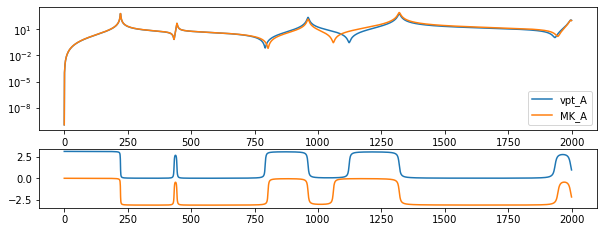

In [16]:
select_out = 2
select_in = 2

plt.figure(figsize=(10,5))
plt.subplot(211)
plt.semilogy(np.abs(vpt_A.vptData[:,select_out,select_in]), label='vpt_A')
plt.semilogy(np.abs(MK_A.FRF[:,select_out,select_in]), label='MK_A')
plt.legend(loc=0)

plt.subplot(413)
plt.plot(vpt_A.freq, np.angle(vpt_A.vptData[:,select_out,select_in]))
plt.plot(vpt_A.freq, np.angle(MK_A.FRF[:,select_out,select_in]));

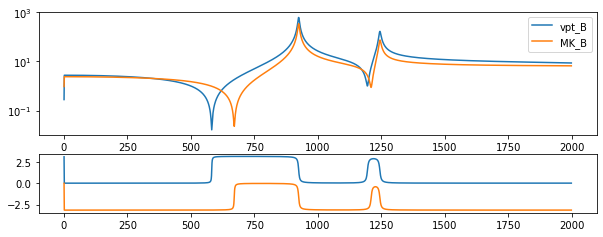

In [17]:
select_out = 2
select_in = 2

plt.figure(figsize = (10,5))
plt.subplot(211)
plt.semilogy(vpt_B.freq, np.abs(vpt_B.vptData[:,select_out,select_in]), label='vpt_B')
plt.semilogy(vpt_B.freq, np.abs(MK_B.FRF[:,select_out,select_in]), label='MK_B')
plt.legend(loc=0)

plt.subplot(413)
plt.plot(vpt_B.freq, np.angle(vpt_B.vptData[:,select_out,select_in]))
plt.plot(vpt_B.freq, np.angle(MK_B.FRF[:,select_out,select_in]));

In second step, transfer FRFs $\boldsymbol{\text{Y}}_{21}^{\text{A}}$ are obtained using VPT methodology. VPT is applied here in order to transform responses at the interface into virtual DoF.

In [18]:
Y21_A = vpt_A.Tu@MK_A.FRF[:,:9,-1:]

In [19]:
Y21_A.shape

(2000, 6, 1)

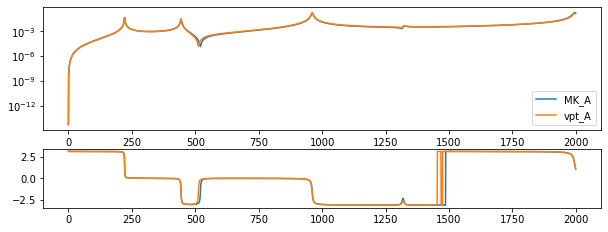

In [20]:
select_out = 2
select_in = 2

plt.figure(figsize = (10,5))
plt.subplot(211)
plt.semilogy(vpt_A.freq, np.abs(MK_A.FRF[:,select_out,-1]), label='MK_A')
plt.semilogy(vpt_A.freq, np.abs(Y21_A[:,select_out,-1]), label='vpt_A')
plt.legend(loc=0)

plt.subplot(413)
plt.plot(vpt_A.freq, np.angle(MK_A.FRF[:,select_out,-1]))
plt.plot(vpt_A.freq, np.angle(Y21_A[:,select_out,0]));

In third step, transfer FRFs $\boldsymbol{\text{Y}}_{32}^{\text{B}}$ are obtained using VPT methodology. VPT is applied here in order to transform excitation forces at the interface into virtual DoF.

In [21]:
Y32_B = MK_B.FRF[:,9:12,:9]@vpt_B.Tf

In [22]:
Y32_B.shape

(2000, 3, 6)

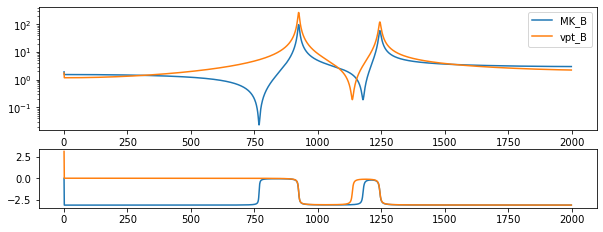

In [23]:
select_out = 2
select_in = 2

plt.figure(figsize = (10,5))
plt.subplot(211)
plt.semilogy(vpt_A.freq, np.abs(MK_B.FRF[:,9+select_out,9+select_in]), label='MK_B')
plt.semilogy(vpt_A.freq, np.abs(Y32_B[:,select_out,select_in]), label='vpt_B')
plt.legend(loc=0)

plt.subplot(413)
plt.plot(vpt_A.freq, np.angle(MK_B.FRF[:,9+select_out,9+select_in]))
plt.plot(vpt_A.freq, np.angle(Y32_B[:,select_out,select_in]));

## Aplication of the direct force TPA

Define operational forces $\boldsymbol{\text{f}}_1$:

In [24]:
f1 = np.ones((Y21_A.shape[0], 1, 1))

Calculate interface forces $\boldsymbol{\text{g}}_2^{\text{B}}$:

In [25]:
g2_B = (np.linalg.pinv(Y22_A + Y22_B) @ Y21_A) @ f1

In [26]:
g2_B.shape

(2000, 6, 1)

Displaying interface forces:

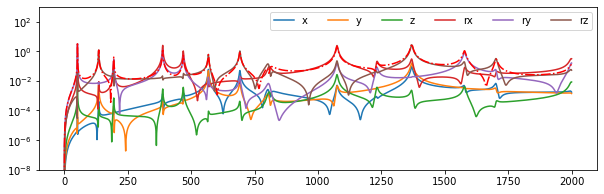

In [27]:
lab = ['x', 'y', 'z', 'rx', 'ry', 'rz']
plt.figure(figsize = (10,3))
for i in range(g2_B.shape[1]):
    plt.semilogy(np.abs(g2_B[:, i, 0]), label=lab[i]);
plt.semilogy(np.abs(np.sum(g2_B,axis = 1)),'r-.')
plt.legend(loc=0, ncol=len(lab));
plt.ylim(10**-8, 10**3);

Path contributions from interface forces:

In [28]:
sel = 0

u_partial = np.zeros_like(g2_B)

for j in range(g2_B.shape[1]):
    u_partial[:,j:j+1,0:1] = Y32_B[:,sel:sel+1,j:j+1]@g2_B[:,j:j+1,:]

In [29]:
u_partial.shape

(2000, 6, 1)

Contributing paths can be examined using a following display:

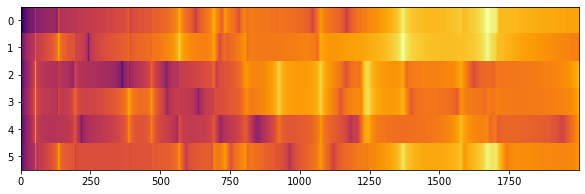

In [30]:
plt.figure(figsize=(10, 3))
values = np.abs(np.reshape(u_partial, (2000, 6))).T[:, 1:]
plt.imshow(values, aspect='auto', cmap=cm.inferno, interpolation='nearest', norm=LogNorm(vmin=np.min(values), vmax=np.max(values)));

Calcualting response $\boldsymbol{\text{u}}_3$.

In [31]:
u3 = Y32_B @ g2_B
u3.shape

(2000, 3, 1)

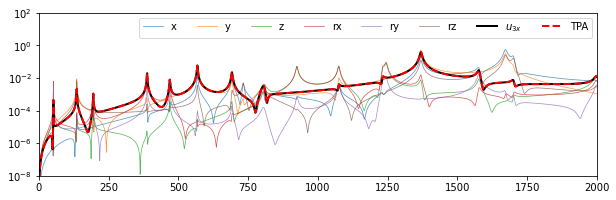

In [32]:
lab = ['x', 'y', 'z', 'rx', 'ry', 'rz']
plt.figure(figsize = (10,3))
for i in range(u_partial.shape[1]):
    plt.semilogy(np.abs(u_partial[:, i, 0]), label=lab[i], lw=0.7, alpha=0.8);
plt.semilogy(np.abs(np.sum(u_partial, axis=1)), 'k', lw=2, label=r'$u_{3x}$')
plt.semilogy(np.abs(u3[:,sel]), '--', color='red', lw=2, label='TPA')
plt.legend(loc=0, ncol=len(lab)+2);
plt.xlim(0, 2000)
plt.ylim(10**-8, 10**2);

On board validation: comparison of predicted $\boldsymbol{\text{u}}_{3}^{\text{TPA}}$ and operational $\boldsymbol{\text{u}}_{3}^{\text{MK}}$:

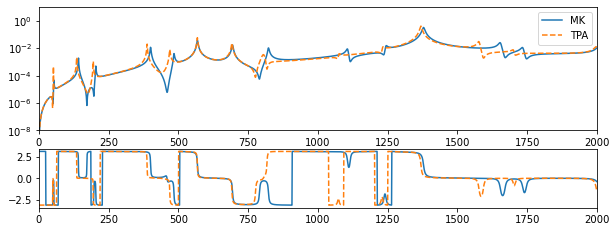

In [33]:
plt.figure(figsize=(10, 5))

u3_MK = MK_AB.FRF[:,9:12,-1:]

plt.subplot(211)
plt.semilogy(np.abs(u3_MK[:,sel,0]), label='MK');
plt.semilogy(np.abs(u3[:,sel,0]), '--', label='TPA');
plt.ylim(10**-8, 10**1);
plt.xlim(0, 2000)
plt.legend(loc=0);

plt.subplot(413)
plt.plot(np.angle(u3_MK[:,sel,0]));
plt.plot(np.angle(u3[:,sel,0]), '--');
plt.xlim(0, 2000);